In [25]:
import pandas as pd
import numpy as numpy
import scipy.spatial.distance as scp_dst
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.colors as clrs
import matplotlib.pyplot as plt
import json
from pprint import pprint
from pandas.io.json import json_normalize


with open('aminer_papers_0_replaced.json') as data_file:    
    data = json.load(data_file)
# data
# f = open('test.json','r')
# data = f.read()
# data
df = pd.DataFrame.from_dict(json_normalize(data), orient='columns')

# json_normalize(data)
# df['authors']
# df


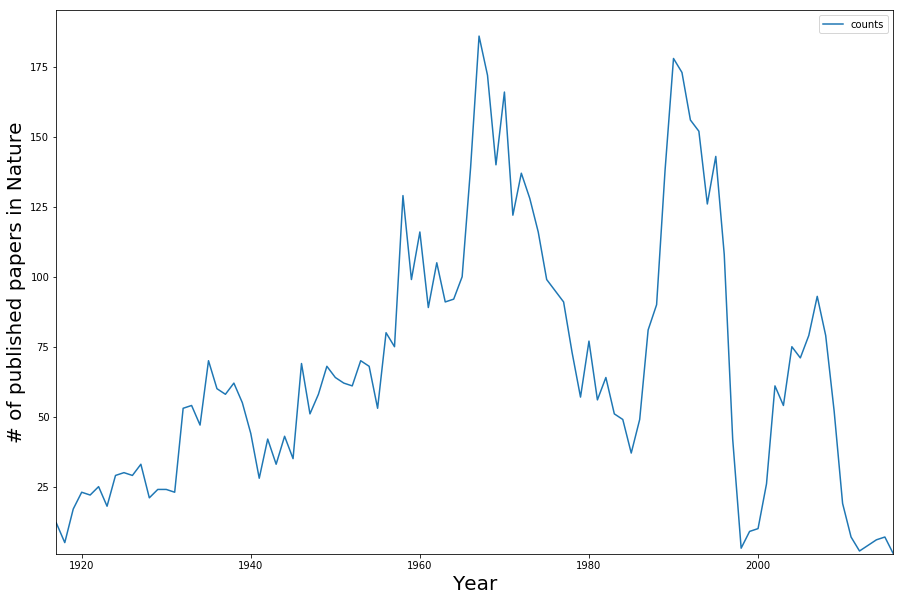

In [69]:
import matplotlib.pyplot as plt

df_clean = df[numpy.isfinite(df['n_citation'])]
df_clean = df_clean.loc[df['lang'] == 'en']
df_clean = df_clean.loc[df['venue'] == 'Nature']
df_clean = df_clean[['id','title', 'abstract', 'authors', 'keywords', 'lang', 'n_citation', 'references', 'url', 'venue', 'year']]
df_clean = df_clean.sort_values(['n_citation'], ascending=[False])
# df_clean.head(20).to_csv('sample.csv', sep=',', index=False)
# df_clean.head(10).to_csv('sample.csv', sep=',', index=False)
df_clean

df_with_venue_citations = df_clean.groupby(['year']).size().reset_index(name='counts')
df_with_venue_citations = df_with_venue_citations.tail(100)

plt.rcParams['figure.figsize']=(15,10)
ans = df_with_venue_citations[['year','counts']].plot.line('year', 'counts')
ans.set_ylim(ymin=1)
ans.set_xlabel("Year", fontsize=20)
ans.set_ylabel("# of published papers in Nature", fontsize=20)
plt.show()

# df_with_venue_citations = df_with_venue_citations.sort_values(['n_citation'], ascending=[False])
# df_with_venue_citations.head(20).to_csv('top_venues.csv', sep=',', index=False)

# df_clean = df_clean[numpy.isfinite(df_clean['venue'])]